 Comparer plusieurs Modèles

Résultats de précision pour chaque modèle: {'Logistic Regression': 71.99285873688909, 'Random Forest': 76.25530015621513, 'Naive Bayes': 66.88239232314216, 'Support Vector Machine': 71.74737781745146}


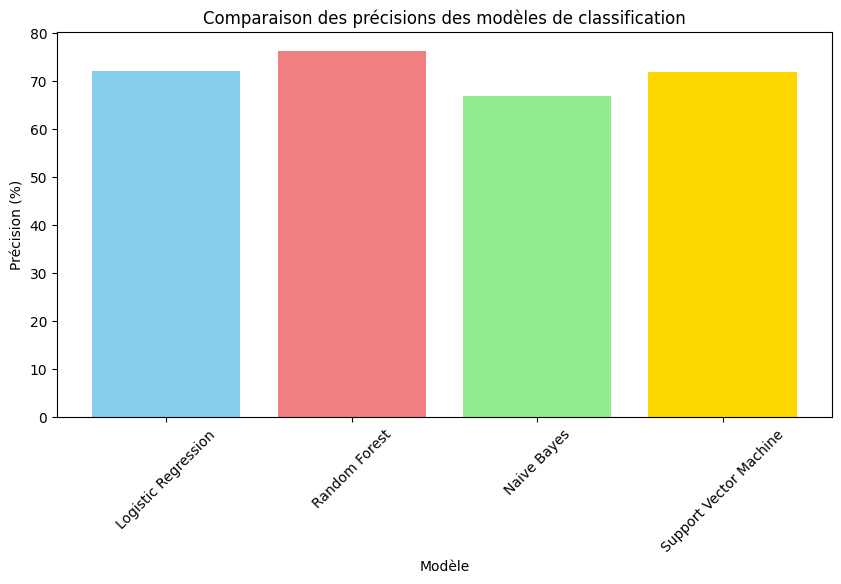

In [2]:
# Importation des librairies
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNBa
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import re
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
import warnings
warnings.filterwarnings("ignore")

# Charger les données
train = pd.read_csv("twitter_training.csv", header=None)
val = pd.read_csv("twitter_validation.csv", header=None)
train.columns = ['id', 'information', 'type', 'text']
val.columns = ['id', 'information', 'type', 'text']

# Prétraitement des données
train_data = train.copy()
val_data = val.copy()
sample_ratio = 0.3

# Échantillonnage du jeu de données d'entraînement et de validation en fonction du ratio
train_data = train_data.sample(frac=sample_ratio, random_state=0)
val_data = val_data.sample(frac=sample_ratio, random_state=0)
# S'assurer que les valeurs dans les colonnes 'text' et 'lower' sont bien des chaînes
train_data["lower"] = train_data["text"].astype(str).str.lower()
train_data["lower"] = train_data["lower"].apply(lambda x: re.sub('[^A-Za-z0-9 ]+', ' ', x))

val_data["lower"] = val_data["text"].astype(str).str.lower()
val_data["lower"] = val_data["lower"].apply(lambda x: re.sub('[^A-Za-z0-9 ]+', ' ', x))


# Tokenisation et suppression des stopwords
stop_words = nltk.corpus.stopwords.words('english')
bow_counts = CountVectorizer(
    tokenizer=word_tokenize,
    stop_words=stop_words,
    ngram_range=(1, 1)
)
reviews_train, reviews_test = train_test_split(train_data, test_size=0.2, random_state=0)
X_train_bow = bow_counts.fit_transform(reviews_train.lower)
X_test_bow = bow_counts.transform(reviews_test.lower)
y_train_bow = reviews_train['type']
y_test_bow = reviews_test['type']

# Définition des modèles
models = {
    "Logistic Regression": LogisticRegression(C=1, solver="liblinear", max_iter=200),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=0),
    "Naive Bayes": MultinomialNB(),
    "Support Vector Machine": SVC(C=1, kernel='linear')
}

# Fonction pour entraîner et évaluer les modèles
def evaluate_models(models, X_train, y_train, X_test, y_test):
    results = {}
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        results[model_name] = accuracy * 100
    return results

# Évaluation
results = evaluate_models(models, X_train_bow, y_train_bow, X_test_bow, y_test_bow)
print("Résultats de précision pour chaque modèle:", results)

#Visualisation des résultats
plt.figure(figsize=(10, 5))
plt.bar(results.keys(), results.values(), color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
plt.xlabel("Modèle")
plt.ylabel("Précision (%)")
plt.title("Comparaison des précisions des modèles de classification")
plt.xticks(rotation=45)
plt.show()


Résultats de précision pour chaque modèle: {'Logistic Regression': 80.95830145371079, 'Random Forest': 87.87299158377965, 'Naive Bayes': 73.47934200459066, 'Support Vector Machine': 81.23565416985463}


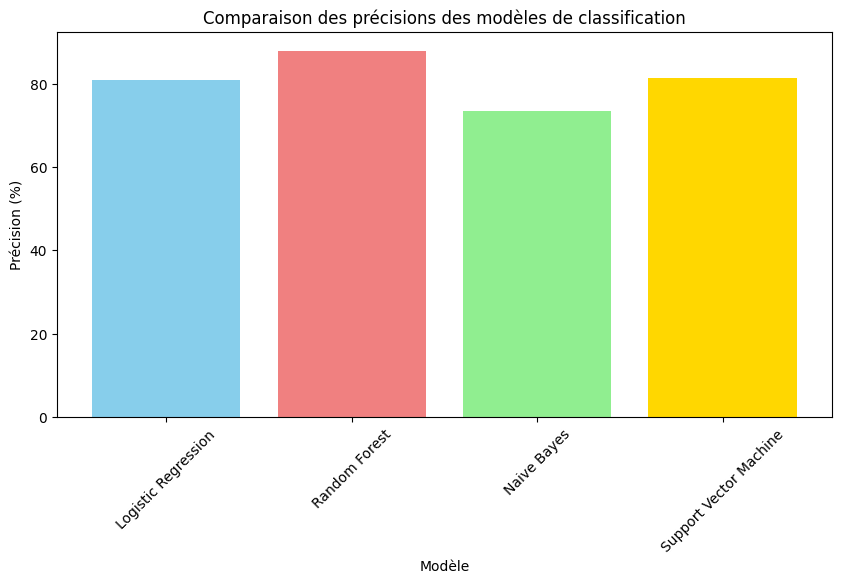

In [1]:
# Prétraitement des données
train_data = train.copy()
val_data = val.copy()
sample_ratio = 0.7

# Échantillonnage du jeu de données d'entraînement et de validation en fonction du ratio
train_data = train_data.sample(frac=sample_ratio, random_state=0)
val_data = val_data.sample(frac=sample_ratio, random_state=0)
# S'assurer que les valeurs dans les colonnes 'text' et 'lower' sont bien des chaînes
train_data["lower"] = train_data["text"].astype(str).str.lower() 
train_data["lower"] = train_data["lower"].apply(lambda x: re.sub('[^A-Za-z0-9 ]+', ' ', x))

val_data["lower"] = val_data["text"].astype(str).str.lower()
val_data["lower"] = val_data["lower"].apply(lambda x: re.sub('[^A-Za-z0-9 ]+', ' ', x))


# Tokenisation et suppression des stopwords
stop_words = nltk.corpus.stopwords.words('english')
bow_counts = CountVectorizer(
    tokenizer=word_tokenize,
    stop_words=stop_words,
    ngram_range=(1, 1)
)
reviews_train, reviews_test = train_test_split(train_data, test_size=0.2, random_state=0)
X_train_bow = bow_counts.fit_transform(reviews_train.lower)
X_test_bow = bow_counts.transform(reviews_test.lower)
y_train_bow = reviews_train['type']
y_test_bow = reviews_test['type']

# Définition des modèles
models = {
    "Logistic Regression": LogisticRegression(C=1, solver="liblinear", max_iter=200),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=0),
    "Naive Bayes": MultinomialNB(),
    "Support Vector Machine": SVC(C=1, kernel='linear')
}

# Fonction pour entraîner et évaluer les modèles
def evaluate_models(models, X_train, y_train, X_test, y_test):
    results = {}
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        results[model_name] = accuracy * 100
    return results

# Évaluation
results = evaluate_models(models, X_train_bow, y_train_bow, X_test_bow, y_test_bow)
print("Résultats de précision pour chaque modèle:", results)

# Visualisation des résultats
plt.figure(figsize=(10, 5))
plt.bar(results.keys(), results.values(), color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
plt.xlabel("Modèle")
plt.ylabel("Précision (%)")
plt.title("Comparaison des précisions des modèles de classification")
plt.xticks(rotation=45)
plt.show()


Résultats de précision pour chaque modèle: {'Logistic Regression': 81.50900448550578, 'Random Forest': 91.12271540469973, 'Naive Bayes': 75.5037825533909, 'Support Vector Machine': 83.75845216576288}


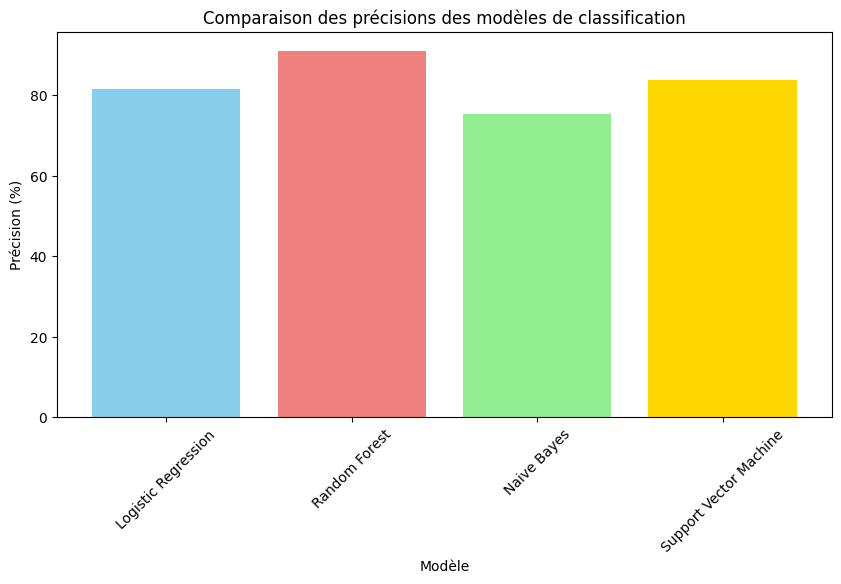

In [4]:
# Prétraitement des données
train_data = train.copy()
val_data = val.copy()
train_data["lower"] = train_data["text"].astype(str).str.lower()
train_data["lower"] = train_data["lower"].apply(lambda x: re.sub('[^A-Za-z0-9 ]+', ' ', x))

val_data["lower"] = val_data["text"].astype(str).str.lower()
val_data["lower"] = val_data["lower"].apply(lambda x: re.sub('[^A-Za-z0-9 ]+', ' ', x))


# Tokenisation et suppression des stopwords
stop_words = nltk.corpus.stopwords.words('english')
bow_counts = CountVectorizer(
    tokenizer=word_tokenize,
    stop_words=stop_words,
    ngram_range=(1, 1)
)
reviews_train, reviews_test = train_test_split(train_data, test_size=0.2, random_state=0)
X_train_bow = bow_counts.fit_transform(reviews_train.lower)
X_test_bow = bow_counts.transform(reviews_test.lower)
y_train_bow = reviews_train['type']
y_test_bow = reviews_test['type']

# Définition des modèles
models = {
    "Logistic Regression": LogisticRegression(C=1, solver="liblinear", max_iter=200),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=0),
    "Naive Bayes": MultinomialNB(),
    "Support Vector Machine": SVC(C=1, kernel='linear')
}

#Entraîner et évaluer les modèles
def evaluate_models(models, X_train, y_train, X_test, y_test):
    results = {}
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        results[model_name] = accuracy * 100
    return results

# Évaluation
results = evaluate_models(models, X_train_bow, y_train_bow, X_test_bow, y_test_bow)
print("Résultats de précision pour chaque modèle:", results)

# Visualisation des résultats
plt.figure(figsize=(10, 5))
plt.bar(results.keys(), results.values(), color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
plt.xlabel("Modèle")
plt.ylabel("Précision (%)")
plt.title("Comparaison des précisions des modèles de classification")
plt.xticks(rotation=45)
plt.show()